# Environment

In [2]:
from image_manipulation.datasets.faces import FacesDataset
from torch.utils.data import DataLoader
from torch_snippets import *
from torchsummary import summary
from image_manipulation.models.conv_vae import ConvVae

# Inspect dataset

In [16]:
a = FacesDataset(Glob('../datasets/cropped_faces_personA'), \
                 Glob('../datasets/cropped_faces_personB'))
x = DataLoader(a, batch_size=32, collate_fn=a.collate_fn)

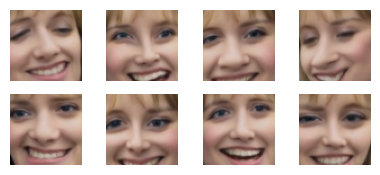

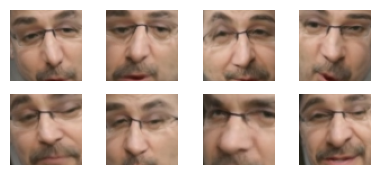

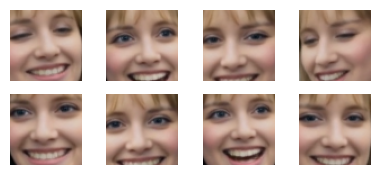

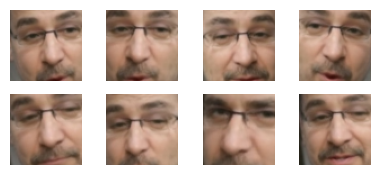

In [22]:
for i in next(iter(x)):
    subplots(i[:8], nc=4, sz=(4,2))

# Inspect model

In [11]:
model = ConvVae()
summary(model, (3,64,64));

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           9,728
         LeakyReLU-2          [-1, 128, 32, 32]               0
            Conv2d-3          [-1, 256, 16, 16]         819,456
         LeakyReLU-4          [-1, 256, 16, 16]               0
            Conv2d-5            [-1, 512, 8, 8]       3,277,312
         LeakyReLU-6            [-1, 512, 8, 8]               0
            Conv2d-7           [-1, 1024, 4, 4]      13,108,224
         LeakyReLU-8           [-1, 1024, 4, 4]               0
           Flatten-9                [-1, 16384]               0
           Linear-10                 [-1, 1024]      16,778,240
           Linear-11                [-1, 16384]      16,793,600
          Reshape-12           [-1, 1024, 4, 4]               0
  ConvTranspose2d-13            [-1, 512, 8, 8]       2,097,664
        LeakyReLU-14            [-1, 51